# Analysis of recruiting data vs success outcomes

In [1]:
# import dependencies and read in needed data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

fbsRecruitingFrame = pd.read_csv("Data/fbsRecruitingData.csv")
fbsWinLossFrame = pd.read_csv("Data/fbsWinLossData.csv")
fbsWinLossFrame = fbsWinLossFrame[['season','team','games','wins','losses','ties','color']]

In [2]:
# combine data
comboFrame = pd.merge(fbsRecruitingFrame,fbsWinLossFrame, on= ['season','team','color'], how='outer')
comboFrame = comboFrame[comboFrame['conference'].isin(['ACC','Pac-10','Pac-12','Big Ten','SEC','Big 12'])]
comboFrame = comboFrame.replace('Pac-10','Pac-12')
comboFrame.conference.unique()

array(['SEC', 'Pac-12', 'Big 12', 'ACC', 'Big Ten'], dtype=object)

In [3]:
# create some percentage metrics to normalize data
comboFrame['winPct'] = comboFrame['wins']/comboFrame['games']*100

In [4]:
# bin the years
bins1 = [2003,2007,2011,2015,2019]
binlabels1 = ['2004-2007','2008-2011','2012-2015','2016-2019']

bins2 = [2004,2008,2012,2016]
binlabels2 = ['2005-2008','2009-2012','2013-2016']

bins3 = [2005,2009,2013,2017]
binlabels3 = ['2006-2009','2010-2013','2014-2017']

bins4 = [2006,2010,2014,2018]
binlabels4 = ['2007-2010','2011-2014','2015-2018']

comboFrame['bin1'] = pd.cut(comboFrame['season'],bins1,labels=binlabels1)
comboFrame['bin2'] = pd.cut(comboFrame['season'],bins2,labels=binlabels2)
comboFrame['bin3'] = pd.cut(comboFrame['season'],bins3,labels=binlabels3)
comboFrame['bin4'] = pd.cut(comboFrame['season'],bins4,labels=binlabels4)
comboFrame

,season,team,id,mascot,abbreviation,conference,division,color,recruitingRank,recruitingPoints,games,wins,losses,ties,winPct,bin1,bin2,bin3,bin4
2,2004,Alabama,333,Crimson Tide,ALA,SEC,West,#690014,21.0,191.78,11,6,5,0,54.545455,2004-2007,NaN,NaN,NaN
3,2004,Arizona,12,Wildcats,ARIZ,Pac-12,NaN,#002449,41.0,154.87,11,3,8,0,27.272727,2004-2007,NaN,NaN,NaN
4,2004,Arizona State,9,Sun Devils,ASU,Pac-12,NaN,#942139,23.0,191.49,11,8,3,0,72.727273,2004-2007,NaN,NaN,NaN
5,2004,Arkansas,8,Razorbacks,ARK,SEC,West,#9c1831,18.0,199.85,11,5,6,0,45.454545,2004-2007,NaN,NaN,NaN
8,2004,Auburn,2,Tigers,AUB,SEC,West,#03244d,30.0,182.43,12,12,0,0,100.000000,2004-2007,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973,2019,Wake Forest,154,Demon Deacons,WAKE,ACC,Atlantic,#9E7E38,57.0,182.26,12,8,4,0,66.666667,2016-2019,NaN,NaN,NaN
1974,2019,Washington,264,Huskies,WASH,Pac-12,North,#2B2F64,15.0,259.19,12,7,5,0,58.333333,2016-2019,NaN,NaN,NaN
1975,2019,Washington State,265,Cougars,WSU,Pac-12,North,#94022a,65.0,174.14,12,6,6,0,50.000000,2016-2019,NaN,NaN,NaN
1978,2019,West Virginia,277,Mountaineers,WVU,Big 12,NaN,#FFC600,48.0,191.83,12,5,7,0,41.666667,2016-2019,NaN,NaN,NaN


In [5]:
# average by each bin and combine into one dataframe
groupedBin1 = comboFrame.groupby(['team','conference','color','bin1'])
groupedStats1 = pd.DataFrame({'avgPoints':groupedBin1['recruitingPoints'].sum()/groupedBin1['recruitingPoints'].count(),
                              'avgWinPct':groupedBin1['winPct'].sum()/groupedBin1['winPct'].count()
                             })
groupedStats1 = groupedStats1.dropna().reset_index().rename(columns={'bin1':'bin'})

groupedBin2 = comboFrame.groupby(['team','conference','color','bin2'])
groupedStats2 = pd.DataFrame({'avgPoints':groupedBin2['recruitingPoints'].sum()/groupedBin2['recruitingPoints'].count(),
                              'avgWinPct':groupedBin2['winPct'].sum()/groupedBin2['winPct'].count()
                             })
groupedStats2 = groupedStats2.dropna().reset_index().rename(columns={'bin2':'bin'})

groupedBin3 = comboFrame.groupby(['team','conference','color','bin3'])
groupedStats3 = pd.DataFrame({'avgPoints':groupedBin3['recruitingPoints'].sum()/groupedBin3['recruitingPoints'].count(),
                              'avgWinPct':groupedBin3['winPct'].sum()/groupedBin3['winPct'].count()
                             })
groupedStats3 = groupedStats3.dropna().reset_index().rename(columns={'bin3':'bin'})

groupedBin4 = comboFrame.groupby(['team','conference','color','bin4'])
groupedStats4 = pd.DataFrame({'avgPoints':groupedBin4['recruitingPoints'].sum()/groupedBin4['recruitingPoints'].count(),
                              'avgWinPct':groupedBin4['winPct'].sum()/groupedBin4['winPct'].count()
                             })
groupedStats4 = groupedStats4.dropna().reset_index().rename(columns={'bin4':'bin'})

groupedStats = pd.concat([groupedStats1,groupedStats2,groupedStats3,groupedStats4],sort=False)
groupedStats

,team,conference,color,bin,avgPoints,avgWinPct
0,Alabama,SEC,#690014,2004-2007,220.9350,59.090909
1,Alabama,SEC,#690014,2008-2011,290.7350,89.743590
2,Alabama,SEC,#690014,2012-2015,315.8575,92.147436
3,Alabama,SEC,#690014,2016-2019,308.3375,93.750000
4,Arizona,Pac-12,#002449,2004-2007,181.6900,36.553030
...,...,...,...,...,...,...
183,West Virginia,Big 12,#FFC600,2011-2014,200.8600,50.000000
184,West Virginia,Big 12,#FFC600,2015-2018,193.8675,68.181818
185,Wisconsin,Big Ten,#A00001,2007-2010,196.1300,75.000000
186,Wisconsin,Big Ten,#A00001,2011-2014,182.8375,74.519231


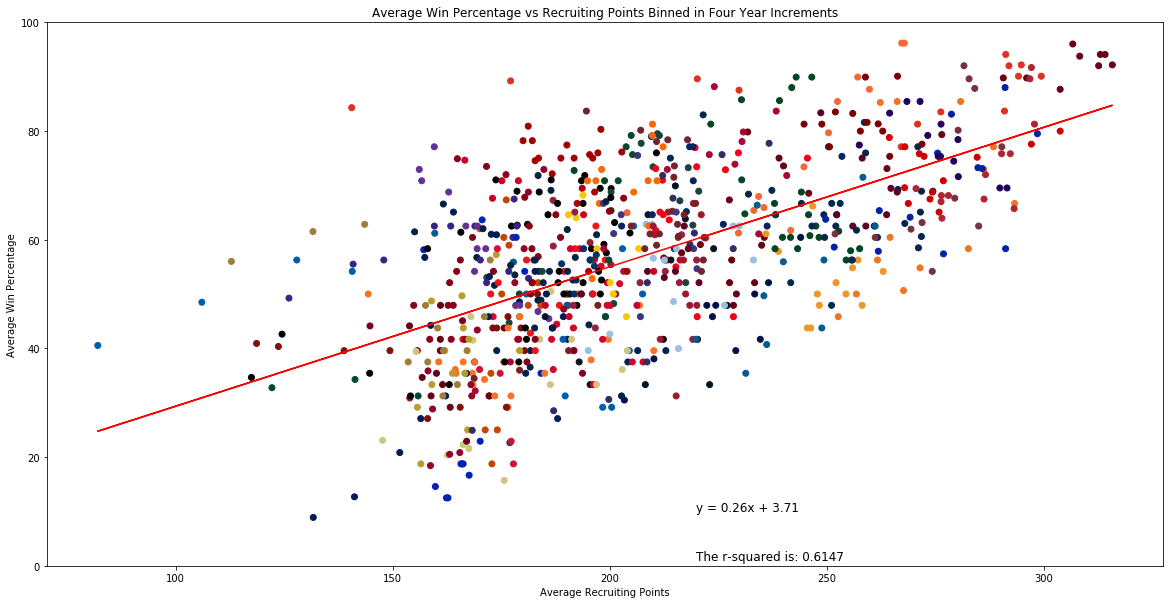

In [6]:
# create scatter/line plot of average win percentage vs average recruiting points
xvalues = groupedStats['avgPoints']
yvalues = groupedStats['avgWinPct']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,10))
plt.scatter(xvalues,yvalues,color=groupedStats['color'])
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq,(220,10),fontsize=12,color="black")
plt.annotate(f"The r-squared is: {round(rvalue,4)}",(220,1),fontsize=12,color="black")
plt.title('Average Win Percentage vs Recruiting Points Binned in Four Year Increments')
plt.xlabel('Average Recruiting Points')
plt.ylabel('Average Win Percentage')
plt.ylim(0,100)
# save figure
plt.savefig("Figures/AverageWinPctVsRecruitingPtsBinned.png")